# Ford Go bike-sharing system and factors of influance
## by (Moamen Mohamed Mohasseb)

## Investigation Overview

> In this investigation i want to look at different factors and their influance in individual rides make in  bike-sharing-system. those factors are:
> * member gender.
> * User Type(subscriber or  customer).
> * Member age. 
> * Days of week(workdays and weekends).
> * Hours of day.

## Dataset Overview

> The data consisted  of information about individual rides made in bike-sharing system with approximately 183412 record. The attributes included user type(subscriber or customer) each trip start and end (time,location,duration) ,members age ,gender and bike share for all trip.We delete about 8265 with null data , some data contain typo but i prefer not to delete it like some ages bigger than 80 and 100 years.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
bike_df=pd.read_csv('bike_df_copy.csv')
bike_df.head(5)

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day,start_hour,age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,17,36
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,12,48
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thu,17,31
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,23,46
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,23,61


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Relation between member gender and Number of rides 

 > In bike sharing system Males are about 75% of system users then Female with 23% finally other with 2% .

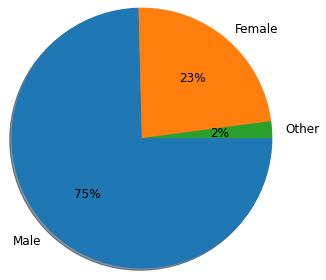

In [10]:
# plot relation between member gender and number of rides
member_gender=bike_df['member_gender'].value_counts()
plt.pie(member_gender.values,labels=member_gender.index,counterclock=False,autopct='%.0f%%',textprops={'size': 'larger'},
                                          shadow=True, radius=1.5);

> ### Although Males is the majority if we get this factor from user type prespective we observe
> * Males is the majority of subscriber.
> * Other is the majority of customer. 

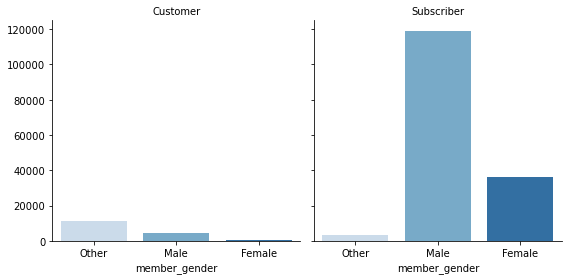

In [12]:
# plot comparison  between customer and subscriber  with user_type 
g = sb.FacetGrid(data=bike_df, col='user_type', col_wrap=2, height =4 )
g.map(sb.countplot, 'member_gender', palette='Blues');
g.set_titles('{col_name}');

###  Member genders work harmony with each other whether through days of week or hours per day
>  We observe that using system by member gender due to days of week or hours per day is balanced  which mean Males,Females and Other  work harmony with each other for example Thurseday is highest Number of rides for all member genders, 8am and 5pm is is highest Number of rides for all member genders. 

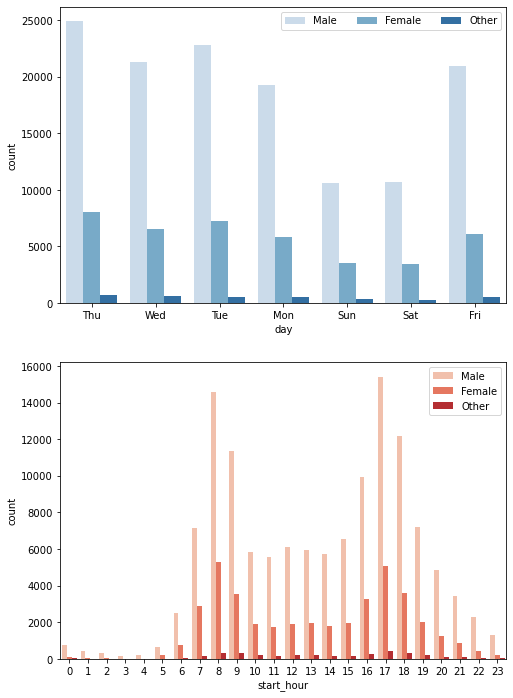

In [11]:
type_order=['Male','Female','Other']
plt.figure(figsize=[8,12])
plt.subplot(2,1,1)
sb.countplot(data=bike_df,x='day',hue='member_gender',palette='Blues',hue_order=type_order)
plt.legend(ncol=3)
ax=plt.subplot(2,1,2)
sb.countplot(data=bike_df,x='start_hour',hue='member_gender',palette='Reds',hue_order=type_order)
ax.legend(ncol = 1)

 ### Member genders Vs. Trip Duration
> Although Males is the majority but Other  usertype has the longest trip duration across all usertypes and in sunday it is the longest trip over all with 1400 sec trip.Then females with 1000 sec trip at last males with 800 sec.So Males have short trips .

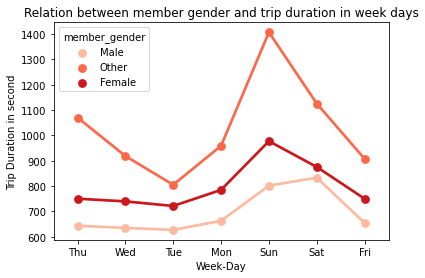

In [13]:
#plot relation between member gender and trip duration in week days
sb.pointplot(data = bike_df, x = 'day', y = 'duration_sec', hue = 'member_gender', palette = 'Reds',ci=None)
plt.title('Relation between member gender and trip duration in week days')
plt.ylabel('Trip Duration in second')
plt.xlabel('Week-Day');

## Number of Rides  through weekdays and day hours

>  Number of rides in week ends is less than other work days
>  It seems that many users use bikes to go and return back from work as we notice increase in rides number from 7 to 9 Am
when users go to work usually and increase also from 4 to 6 PM when they return back to home.
>  also increase rides number in work days than week end support this observation.

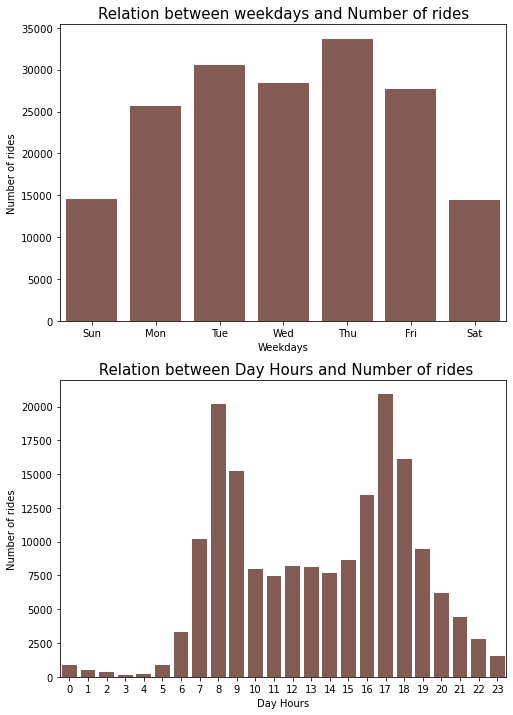

In [68]:
#the relation between weekdays and Number of rides , between Day Hours and Number of ride
day_order=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
#month_order=['',]
plt.figure(figsize=[8,12]);
plt.subplot(2,1,1);
plt.title("Relation between weekdays and Number of rides",size=15);
sb.countplot(data=bike_df,x='day',color=sb.color_palette()[5],order=day_order);
plt.xlabel('Weekdays')
plt.ylabel('Number of rides');
ax=plt.subplot(2,1,2);
plt.title("\n Relation between Day Hours and Number of rides",size=15);
sb.countplot(data=bike_df,x='start_hour',color=sb.color_palette()[5]);
plt.xlabel('Day Hours');
plt.ylabel('Number of rides');

## Relation between User Type and Number of rides
> In bike sharing system Subscriber are the majorty of user type with  91% of system users then  ordinary customer is just 9%


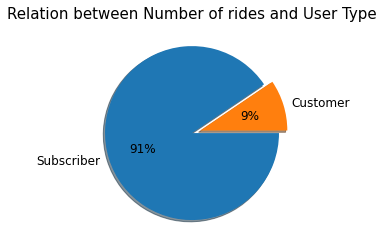

In [69]:
# plot User type and number of rides
explode=(0,0.1)
plt.pie(bike_df.user_type.value_counts().values,labels=bike_df.user_type.value_counts().index,counterclock=False,autopct='%.0f%%',textprops={'size': 'larger'},
                                          shadow=True, radius=1,explode=explode);
plt.title("Relation between Number of rides and User Type",size=15)
plt.show()



## Relation between user type and weekdays in different day hours
> Although Subscribers is the majority ,customers uses system heavily in weekends we can observe that especially from 10 AM to 5 PM.
> as we said before its appear opviosly here that many users use bikes to go and return back from work as we notice increase in rides number from 7 to 9 Am when users go to work usually and increase also from 4 to 6 PM when they return back to home. may be for avoiding rush hours traffic.

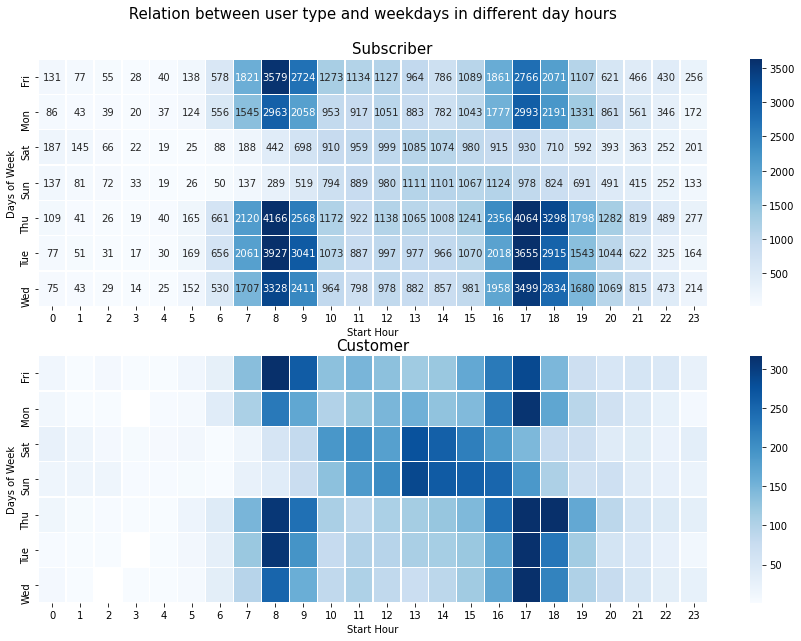

In [17]:
#plot relation between user type and weekdays in different day hours
plt.figure(figsize=[15,10])
plt.subplot(2, 1, 1)
subsc = bike_df.query('user_type == "Subscriber"')
ct_counts = subsc.groupby(['day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='day', columns='start_hour', values='count')
sb.heatmap(ct_counts, annot=True, robust=True,fmt="d",linewidths=0.3, cmap='Blues');
plt.title(' Relation between user type and weekdays in different day hours \n  \n        Subscriber',size=15 );
plt.xlabel('Start Hour');
plt.ylabel('Days of Week');

plt.subplot(2, 1, 2)
subsc = bike_df.query('user_type == "Customer"')
ct_counts = subsc.groupby(['day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='day', columns='start_hour', values='count')

sb.heatmap(ct_counts, robust=True, cmap='Blues',linewidths=0.3);
plt.title('Customer',size=15);
plt.xlabel('Start Hour');
plt.ylabel('Days of Week');

## (Visualization 3)

> The plot of member ages is right-skewed its normal so we  set limit between 20 and 80 years old as below and above this value consider outliers or typo errors as   some members has 140,120,100 years old.



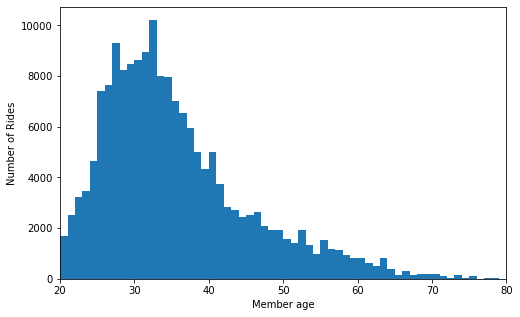

In [20]:
# plot member ages and set limit between 20 and 80 years as below and above this value consider outliers or typo errors
bin_size=np.arange(0,bike_df.age.max()+1,1)
plt.figure(figsize=[8,5])
plt.hist(data=bike_df,x='age',bins=bin_size)
plt.xlabel("Member age")
plt.ylabel("Number of Rides")
plt.xlim([20,80])
plt.show()

> * #### Males is the majority of subscriber.
> * #### Other is the majority of customer. 

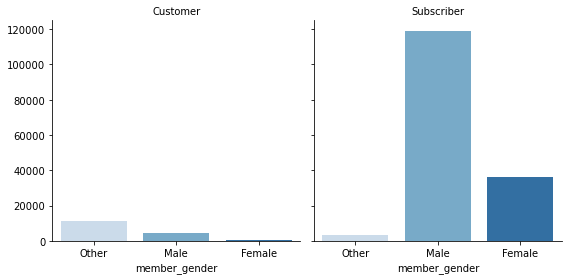

In [21]:
# plot comparison  between customer and subscriber  with user_type 
g = sb.FacetGrid(data=bike_df, col='user_type', col_wrap=2, height =4 )
g.map(sb.countplot, 'member_gender', palette='Blues');
g.set_titles('{col_name}');

> #### Relation between age and trip duration for large duration only as we can see from 20 years old to 50 years old get long Trip duration than old people  which is normal , we cannot compare ages with short trip duration as all ages has no difference #### 

Text(0.5, 1.0, 'relation between Age and Trip duration')

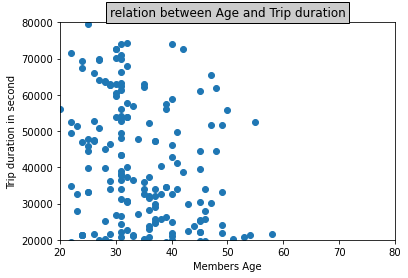

In [25]:
#relation between age and trip duration for large duration only 
plt.scatter(data=bike_df,y='duration_sec',x='age')
plt.xlim([20,80])
plt.ylim([20000,80000])
plt.xlabel("Members Age")
plt.ylabel("Trip duration in second")
plt.title("relation between Age and Trip duration",bbox={'facecolor':'0.8', 'pad':4})

>  #### We observe that weekend has long trip duration than work day###

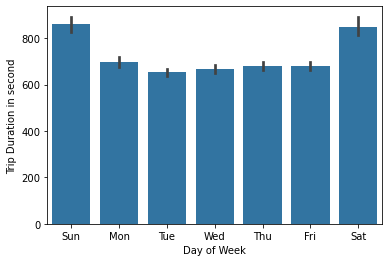

In [24]:
#relation between age and trip duration and days of week
sb.barplot(data=bike_df, x='day', y='duration_sec', color=sb.color_palette()[0],order=day_order);
plt.xlabel('Day of Week');
plt.ylabel('Trip Duration in second');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!